### 기호 계산(Symbolic Computation)이란 무엇인가?

기호계산은 수학 객체 계산을 기호적으로 처리한다. 수학객체를 근사적이 아닌 정확하게 표현되고,
평가되지 않는 변수를 갖는 수학 표현식은 기호적 형태로 그대로 남겨있다는 것을 의미한다.

예제를 살펴보자. 제곱근을 계산하는데 파이썬 내장함수를 사용한다. 이런 경우 다음과 같이 코드를 작성하고 명령어를 전달한다.

In [1]:
import math
math.sqrt(9)

3.0

9 는 완전 제곱수라 정답으로 3이 출력된다. 하지만, 완전제곱수가 아닌 경우를 살펴보자.

In [2]:
math.sqrt(8)

2.8284271247461903

완전제곱수가 존재하지 않기 때문에, 근사값이 출력된다. 
2.8284271247461903 출력값은 8에 대한 정확한 제곱근은 아니다. (사실, 8에 대한 정확한 제곱근은 유한 소수점으로 표현될 수는 없는데 이유는 무리수라서 그렇다. 관심을 갖는 것은 8 제곱근을 소수점으로 표현하는 것이라 작업을 완수했다.

조금더 나가면, $\sqrt{8} = \sqrt{4*2} = 2\sqrt{2}$이 됨을 상기한다. 이와 같은 형태로 추론하는 것은 쉬울 수도 있지만, 어려운 수의 경우 매우 힘들 수도 있다. 기호 계산이 도입되는 좋은 지점이 여기다. 심파이 같은 기호계산시스템에서, 완전 제곱이 아닌 제곱수는 기본디폴트 설정으로 평가되지 않고 그냥 놔두게 된다.

In [7]:
import sympy
sympy.sqrt(3)

기호로 표현된 결과값은 기호적으로 더 단순화된다. 이런 지점에서 기호계산의 진정한 힘을 볼 수 있게 된다.

In [8]:
sympy.sqrt(8)

### 좀더 흥미로운 예제

상기 예제를 통해서 심파이로 정확하게 무리수를 다루는 방법을 살펴봤다. 하지만,
이보다도 훨씬 더 강력하다. 
심파이 같은 기호계산시스템(컴퓨터 대수 시스템, Computer Algebra System, CAS)은 기호로된 표현식을 변수로 계산할 수 있는 기능을 갖추고 있다.

나중에 보게 되지만, 심파이에서 변수는 `symbols`를 사용해서 정의된다.
다른 많은 기호 처리 시스템과 달리, 심파이에서 변수는 사용되기 전에 정의가 되어야만 된다. 이유에 대해서는 다음 학습에 논의된다.

$x+2y$ 수학 표현식을 나타내는 기호표현식을 정의하자.

In [10]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
expr

`x`와 `y`가 평범한 파이썬 변수처럼 `x + 2*y`를 작성하는데 주목한다.
하지만, 이번 경우에 무언가로 평가결과가 도출되는 대신에, `x + 2*y`로 표현식이 남아 있다. 이제 몇가지 재미난 작업을 수행해본다.

In [12]:
expr + 1

In [14]:
x + 2*y

상기 예제에서 뭔가 차이나는 점에 주목한다.
`expr -x` 라고 타이핑하면, `x + 2*y -x` 를 얻는 것이 아니라, 바로 `2*y`가 된다.
`x` 와 `-x`는 서로 자동으로 상쇄된다. `sqrt(8)` 이 자동으로 `2*sqrt(2)` 로 변하는 것과 유사하다.
하지만, 심파이에서 항상 그런 것은 아니다.

In [15]:
x * expr

$x(x+2y)$ 가 $x^2+2xy$ 로 변환되는 것을 기대했지만, 표현식은 그대로 변하지 않았다.
이런점이 심파이에서 일반적 주제다. $x-x=0$ , $\sqrt{8} = 2 \sqrt{2}$ 같은 명확한 간략화는 별도로 두고, 간략화 대부분은 자동으로 수행되지 않는다. 인수분해된 $x(x+2y)$ 형태를 선호하거나, 인수분해를 푼 $x^2+2xy$ 형태를 선호하는 경우가 있기 때문이다.
두가지 형태 모두 상황에 따라 유용성이 있다. 심파이에서 한 형태에서 다른 형태로 바꾸는 함수가 존재한다.

In [16]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
expanded_expr

In [18]:
factor(expanded_expr)

### 기호계산의 강력한 힘

심파이 같은 기호계산시스템의 진정한 힘은 모든 유형의 계산을 기호적으로 수행할 수 있다는 점이다.
심파이는 표현식을 간략화하고, 미분, 적분, 극한을 계산하고, 방정식을 풀고, 행렬을 처리하는 등 많은 작업을 수행하는데 모두 기호적으로 작업한다. 
기호계산시스템은 플롯을 그리고, 출력($LaTeX$, 수학공식에 대한 깔끔한 2차원 산출물), 자동코드 생성, 물리학, 통계학, 조합론(combinatorics), 정수론(number theory), 기하학, 로직 등에 대한 모듈도 담고 있다.
심파이가 갖고 있는 일부를 맛볼 수 있는 일부 사례가 다음에 나와 있다.

In [23]:
from sympy import *
x, t, z, nu = symbols('x t z nu')

유니코드 문자로 $x, t, z, \nu$ 깔끔한 출력결과를 얻게 된다.

In [24]:
init_printing(use_unicode=True)

$sin(x)e^x$ 함수를 미분한다.

In [25]:
diff(sin(x)*exp(x), x)

$\int(e^x sin(x) + e^x cos(x) dx)$ 적분을 계산해본다.

In [26]:
integrate(exp(x)*sin(x)+exp(x)*cos(x),x)

$\int_{-\infty}^{\infty} sin(x^2 ) dx$ 적분을 계산한다.

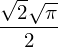

In [27]:
integrate(sin(x**2), (x, -oo, oo))

$\lim_{x \to 0} \frac{sin(x)}{x}$ 극한을 구해본다.

In [28]:
limit(sin(x)/x, x, 0)

$x^2 - 2 = 0$ 방정식을 푼다.

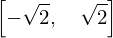

In [31]:
solve(x**2 - 2, x)

$y'' - y = e^t$ 미분 방정식을 푼다.

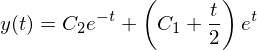

In [33]:
y = Function('y')
dsolve(Eq(y(t).diff(t,t)-y(t), exp(t)), y(t))

$\begin{bmatrix} 1 & 2 \\ 2 & 2 \end{bmatrix}$ 행렬에 대한 고유값(eigenvalue)을 구한다.

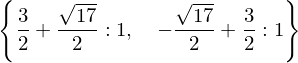

In [35]:
Matrix([[1,2], [2,2]]).eigenvals()

구모양의 베셀 함수 $j_{\nu}(z)$ 에 관해서 베셀 함수 $J_{\nu}(z)$를 다시 작성하시오.

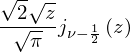

In [36]:
besselj(nu, z).rewrite(jn)

$LaTeX$을 사용해서 $\int_{0}^{\pi} \cos^{2}{\left (x \right )}\, dx$ 을 출력하시오.

In [37]:
 latex(Integral(cos(x)**2, (x, 0, pi)))

'\\int_{0}^{\\pi} \\cos^{2}{\\left (x \\right )}\\, dx'

### 왜 심파이인가?

컴퓨터 대수 시스템은 상당히 많다. [위키피디아](https://en.wikipedia.org/wiki/List_of_computer_algebra_systems) 페이지를 보면 다양한 컴퓨터 대수 시스템이 나와 있다. 심파이를 다른 대안 대수시스템보다 좋은 점은 무엇일까?

첫째로 무엇보다 심파이는 **완전한 자유(free)**를 제공한다. 오픈소스이며 BSD 라이선스를 따라서 원하면 코드를 변경할 수 있고, 상업적으로 판매도 가능하다. 메이플, 매스매티카 같이 라이선스마다 수십만원의 비용이 소요되는 대중적인 상업시스템과 비교되는 점이다.

두번째로, 심파이는 파이썬을 사용한다. 
컴퓨터 대수 시스템 대부분은 본인만의 언어를 갖추고 있다. 심파이는 그런 점에서 많이 다르다.
심파이는 전적으로 파이썬으로 작성되고, 파이썬으로 실행된다.
이미 파이썬을 알고 있다면, 심파이로 시작하는 것이 훨씬 쉽다는 것을 의미한다.
왜냐하면 이미 파이썬 구분을 알고 있기 때문이다. 설사 파이썬을 모른다고 하더라도 배우기 매우 쉽다.
파이썬이 잘 설계되었고, 전장에서 검증된 언어라는 것은 널리 알려져 있다.
심파이 개발자가 수학 소프트웨어를 작성할 역량을 갖추고 있다고 하지만, 프로그래밍 언어 설계는 완전히 다른 영역이다.
기존 언어를 재사용함으로써, 해당 주제에만 집중할 수 있게 된다: 수학

또다른 컴퓨터 대수 시스템, 세이지(Sage)도 파이썬을 기본 언어로 사용한다.
하지만, 세이지는 엄청 크다. 기가바이트 넘게 다운로드해야 된다.
심파이의 장점은 경량에 있다. 
상대적으로 적다는 점에 더하여 파이썬을 제외한 다른 어떤 의존성도 없다. 그래서, 쉽게 거의 어느 곳에서나 사용될 수 있다.
더욱이, 세이지의 목적과 심파이의 목적은 다르다. 
세이지는 수학에 관해서는 전체 기능을 갖춘 시스템이 되고자 한다. 모든 오픈소스 수학시스템을 모두 모아 하나로 컴파일해서 이런 원대한 목표를 달성하려고 한다. 세이지에서 `integrate` 같은 함수를 호출할 때, 세이지가 포함시킨 오픈소스 팩키지 중 하나를 호출하게 된다.
사실 심파이는 세이지에 포함되어 있다. 
반대로, 심파이는 독립된 시스템을 지향해서 심파이에 자체적으로 모든 기능을 구현하려고 한다.

심파이의 마지막 중요한 기능은 심파이가 라이브러리로 사용될 수 있다는 점이다.
컴퓨터 대수시스템 다수는 인터랙티브 환경에서 제공할 수 있는 사용편의성에 초점을 맞춘다.
따라서 자동화하거나, 확장하려면 한계가 있다.
심파이로 인터랙티브 파이썬 환경에서도 쉽게 사용하거나 파이썬 응용프로그램에 가져오기와서 사용하기도 좋다.
심파이는 API도 제공해서 사용자 정의 함수로 확장도 쉽다.